In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
14,2250,3,101.0
5,1170,2,38.0
11,2785,4,140.0
8,1310,3,50.0
17,1540,3,60.0


In [3]:
df['bedrooms'].value_counts()

3    8
2    6
4    4
5    1
1    1
Name: bedrooms, dtype: int64

#### scale of area is quite bigger than scale of bedrooms so we will do scaling first 

In [4]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_x =sx.fit_transform(df.drop('price',axis='columns'))
scaled_x
#minmax scalling bring the value in between 0 to 1.

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y
#.values returns a 2-dimensional numpy array containing all the values in the DataFrame
# Similar to DataFrame, the .values attribute can be used with a pandas Series to retrieve the underlying numpy array representation of the Series. It returns a 1-dimensional numpy array containing the values

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

## Batch Gradient Descent

In [6]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features =x.shape[1]
    # calculating no of features we know that x has  20 rows and 2 columns so we can say that there are two different types of features of columns(features)
    w=np.ones(shape=(number_of_features))
    # intializing value of w with one
    #for all features in starting 
    b=0
    total_samples =x.shape[0]
    cost_list = []
    epochs_list=[]
    for i in range(epochs):
        
        y_predicted =  np.dot(w,scaled_x.T) + b #w1*area +w2*bedroom+bias we are doing this using dot product both gives same result
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
#The choice of including a factor of 2 is often made for convenience or mathematical convention in specific optimization algorithms, 
#such as gradient descent. It does not fundamentally alter the optimization process, but it can affect the scale of the gradient updates
#and the overall learning rate of the model.
        cost = np.mean(np.square(y_true-y_predicted))  ## cost is  cumulatiove error ,loss  is an individual error 
    
        w=w-learning_rate * w_grad
        b=b-learning_rate * b_grad
        
        
        
        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
            
    return w,b,cost,cost_list,epochs_list 

w,b,cost,cost_list,epochs_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost      

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [7]:
scaled_x.T.shape

(2, 20)

In [8]:
scaled_x.shape

(20, 2)

In [9]:
#don't consider this as it is just part for understanding 
number_of_features =scaled_x.shape[1]
# w=np.ones(shape=(number_of_features))
w.shape

(2,)

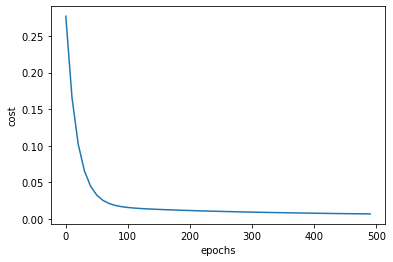

In [10]:
### ploting the graph to show that how cost (loss) decreasing after every epochs
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epochs_list,cost_list)

In [11]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0] # scaling the value in range of 0 and 1 
    scaled_price =w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]  #here we are putting [0][0] for getting exact value ,insted of in 2d array 
predict(2600,4,w,b)

C:\Users\meetm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

## stochastic Gradient

In [35]:
import random
def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features =x.shape[1]
    # calculating no of features we know that x has  20 rows and 2 columns so we can say that there are two different types of features of columns(features)
    # numpy array with 1 row and columns equal to number of features .
    w=np.ones(shape=(number_of_features))
    # intializing value of w with one
    #for all features in starting 
    b=0
    total_samples =x.shape[0]
    cost_list = []
    epochs_list=[]
    for i in range(epochs):
        #in stochastic gradient we will be picking random index
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y=y_true[random_index]
        y_predicted = np.dot(w,sample_x.T)+b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
#The choice of including a factor of 2 is often made for convenience or mathematical convention in specific optimization algorithms, 
#such as gradient descent. It does not fundamentally alter the optimization process, but it can affect the scale of the gradient updates
#and the overall learning rate of the model.
        
        w=w-learning_rate * w_grad
        b=b-learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))  ## cost is  cumulatiove error ,loss  is an individual error 
        
        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
            
    return w,b,cost,cost_list,epochs_list 

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epochs_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),2000)
w,b,cost      
        

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [36]:
scaled_x.shape

(20, 2)

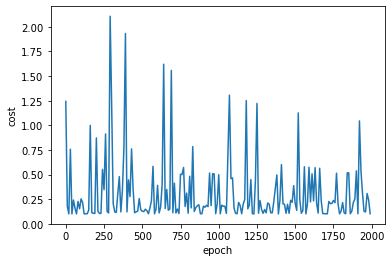

In [37]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epochs_list_sgd,cost_list_sgd)

In [38]:
predict(2600,4,w_sgd,b_sgd) # predicting with stochastic gradient 

C:\Users\meetm\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


140.19008147844625

## mini batch gradient 